### In this notebook we will be making our own segmentation model using the YoloV8 architecture

In [ ]:
!pip uninstall -y numpy
!pip install "numpy==1.26.4"


In [1]:
!pip install ultralytics==8.2.103 -q
!pip install roboflow==1.1.48 --quiet


In [2]:
# !pip install roboflow==1.1.48 --quiet

import roboflow

roboflow.login()

rf = roboflow.Roboflow()

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).


In [3]:
from roboflow import Roboflow

project = rf.workspace("gerald-ndawula-f5prr").project("unimib2016-rceze-we6zf")
dataset = project.version(1).download("yolov8")

print("Dataset location:", dataset.location)


loading Roboflow workspace...
loading Roboflow project...
Dataset location: /content/unimib2016-1


In [4]:
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")   # or yolov8s-seg.pt

results = model.train(
    data=f"{dataset.location}/data.yaml",
    task="segment",
    epochs=10,       # ⬅️ fewer epochs (try 3–5)
    imgsz=640,
)


New https://pypi.org/project/ultralytics/8.3.235 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/unimib2016-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 1411357f92b65287cbff499e231e101002bc5c37


wandb: WARNING Invalid choice
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Find your API key here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: rbhatt4 (rbhatt4-umbc) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 77.1MB/s]


AMP: checks passed ✅


train: Scanning /content/unimib2016-1/train/labels... 2094 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2094/2094 [00:02<00:00, 1015.68it/s]

train: New cache created: /content/unimib2016-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/unimib2016-1/valid/labels... 199 images, 0 backgrounds, 0 corrupt: 100%|██████████| 199/199 [00:00<00:00, 804.31it/s]

val: New cache created: /content/unimib2016-1/valid/labels.cache


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000132, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.05G      0.598      1.319      4.502     0.9607         42        640: 100%|██████████| 131/131 [00:22<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        199        731      0.819     0.0933      0.119       0.11      0.819     0.0935       0.12       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.03G       0.49     0.8221      3.051     0.9011         44        640: 100%|██████████| 131/131 [00:17<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.92it/s]


                   all        199        731      0.729      0.235      0.264      0.243      0.728      0.235      0.263       0.24

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.03G     0.4689      0.729      2.137     0.8856         45        640: 100%|██████████| 131/131 [00:17<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.88it/s]

                   all        199        731      0.658      0.392      0.403      0.372      0.658      0.393      0.403      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.02G     0.4405     0.6748      1.662     0.8748         55        640: 100%|██████████| 131/131 [00:17<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.89it/s]


                   all        199        731      0.674       0.48      0.507      0.471      0.674      0.481      0.508      0.467

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.03G     0.4162     0.6379      1.421     0.8622         48        640: 100%|██████████| 131/131 [00:17<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.92it/s]

                   all        199        731      0.768      0.539      0.612       0.57      0.769       0.54      0.613      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.02G     0.3904     0.6118      1.245     0.8476         53        640: 100%|██████████| 131/131 [00:17<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.97it/s]

                   all        199        731       0.85      0.539      0.659      0.616       0.85      0.539      0.659      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.03G     0.3815     0.6079      1.165     0.8453         44        640: 100%|██████████| 131/131 [00:17<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.88it/s]


                   all        199        731      0.838      0.557      0.685      0.642      0.841       0.56      0.689      0.636

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.05G     0.3602     0.5786      1.059     0.8377         41        640: 100%|██████████| 131/131 [00:17<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.04it/s]

                   all        199        731      0.828      0.613        0.7      0.656      0.828      0.614      0.699      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.03G     0.3602      0.584      1.034     0.8342         51        640: 100%|██████████| 131/131 [00:17<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.86it/s]

                   all        199        731       0.79      0.631      0.716      0.668      0.791      0.632      0.715      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.02G     0.3419     0.5591     0.9677     0.8286         52        640: 100%|██████████| 131/131 [00:17<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.87it/s]

                   all        199        731      0.814      0.626      0.731      0.684      0.814      0.626       0.73      0.672



10 epochs completed in 0.059 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 6.9MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 6.9MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,335,512 parameters, 0 gradients, 11.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]


                   all        199        731      0.813      0.627       0.73      0.685      0.813      0.627       0.73      0.671
               arancia         17         19      0.861      0.947      0.976      0.929      0.861      0.947      0.976      0.913
               arrosto         10         10      0.752        0.8      0.903      0.852      0.752        0.8      0.903      0.836
    arrosto_di_vitello          4          4          1          0     0.0328     0.0289          1          0     0.0328     0.0263
                banane          3          3          1      0.922      0.995      0.929          1      0.922      0.995      0.591
              bruscitt          3          3      0.699          1      0.913      0.871      0.699          1      0.913      0.855
                budino         27         27      0.913          1      0.995      0.982      0.913          1      0.995       0.91
                carote         30         30      0.893        0.9   

lr/pg0,▃▆█▇▆▅▄▃▂▁
lr/pg1,▃▆█▇▆▅▄▃▂▁
lr/pg2,▃▆█▇▆▅▄▃▂▁
metrics/mAP50(B),▁▃▄▅▇▇▇███
metrics/mAP50(M),▁▃▄▅▇▇████
metrics/mAP50-95(B),▁▃▄▅▇▇▇███
metrics/mAP50-95(M),▁▃▄▅▇▇████
metrics/precision(B),▇▄▁▂▅██▇▆▇
metrics/precision(M),▇▄▁▂▅██▇▆▇
metrics/recall(B),▁▃▅▆▇▇▇███
+12,...


In [5]:
# ===== YOLOv8 segmentation evaluation (final working version) =====

# 1. Run validation
val_metrics = model.val(
    data=f"{dataset.location}/data.yaml",
    task="segment",
    split="val",
    imgsz=640,
)

# 2. Overall metrics
print("📊 Validation metrics")
print("Box mAP50-95:", val_metrics.box.map)
print("Box mAP50:    ", val_metrics.box.map50)
print("Seg mAP50-95:", val_metrics.seg.map)
print("Seg mAP50:    ", val_metrics.seg.map50)

# 3. Per-class segmentation AP@0.5
seg_metric = val_metrics.seg
ap50_per_class = seg_metric.ap50   # NumPy array, length = number of classes
names = val_metrics.names          # dict: {class_idx: class_name}

print("\nPer-class segmentation AP@0.5:")
for idx, ap in enumerate(ap50_per_class):
    name = names.get(idx, f"class_{idx}")
    print(f"{name}: {ap:.4f}")


Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,335,512 parameters, 0 gradients, 11.7 GFLOPs


val: Scanning /content/unimib2016-1/valid/labels.cache... 199 images, 0 backgrounds, 0 corrupt: 100%|██████████| 199/199 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.55it/s]


                   all        199        731      0.814      0.626      0.731      0.685      0.814      0.627       0.73       0.67
               arancia         17         19      0.864      0.947      0.976      0.929      0.864      0.947      0.976      0.918
               arrosto         10         10      0.757        0.8      0.903      0.852      0.757        0.8      0.903      0.827
    arrosto_di_vitello          4          4          1          0     0.0334     0.0294          1          0     0.0334     0.0267
                banane          3          3          1      0.922      0.995      0.929          1      0.922      0.995      0.591
              bruscitt          3          3        0.7          1      0.913      0.871        0.7          1      0.913      0.855
                budino         27         27      0.914          1      0.995      0.979      0.914          1      0.995      0.908
                carote         30         30      0.893        0.9   

Using data.yaml at: /content/unimib2016-1/data.yaml
Validation images folder: /content/unimib2016-1/valid/images
Using 4 validation images:
 - /content/unimib2016-1/valid/images/20151127_122131_jpg.rf.547fe1847f9132f18debd2bc6d88755a.jpg
 - /content/unimib2016-1/valid/images/20151127_122651_jpg.rf.699350b59f9912efe5b70740b27451aa.jpg
 - /content/unimib2016-1/valid/images/20151127_123116_jpg.rf.999a2faeea458962e1094cdc69781f63.jpg
 - /content/unimib2016-1/valid/images/20151127_123200_jpg.rf.82c83707d8e03ee1aa158edeb4a8e6ef.jpg

0: 480x640 1 mandarini, 1 pane, 1 pizzoccheri, 1 spinaci, 22.9ms
1: 480x640 1 pasta_zafferano_e_piselli, 22.9ms
2: 480x640 1 budino, 1 pane, 1 pizza, 1 pizzoccheri, 22.9ms
3: 480x640 1 arrosto, 2 mandarinis, 1 pasta_zafferano_e_piselli, 1 spinaci, 22.9ms
Speed: 3.1ms preprocess, 22.9ms inference, 4.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict

Predictions saved to: runs/segment/predict


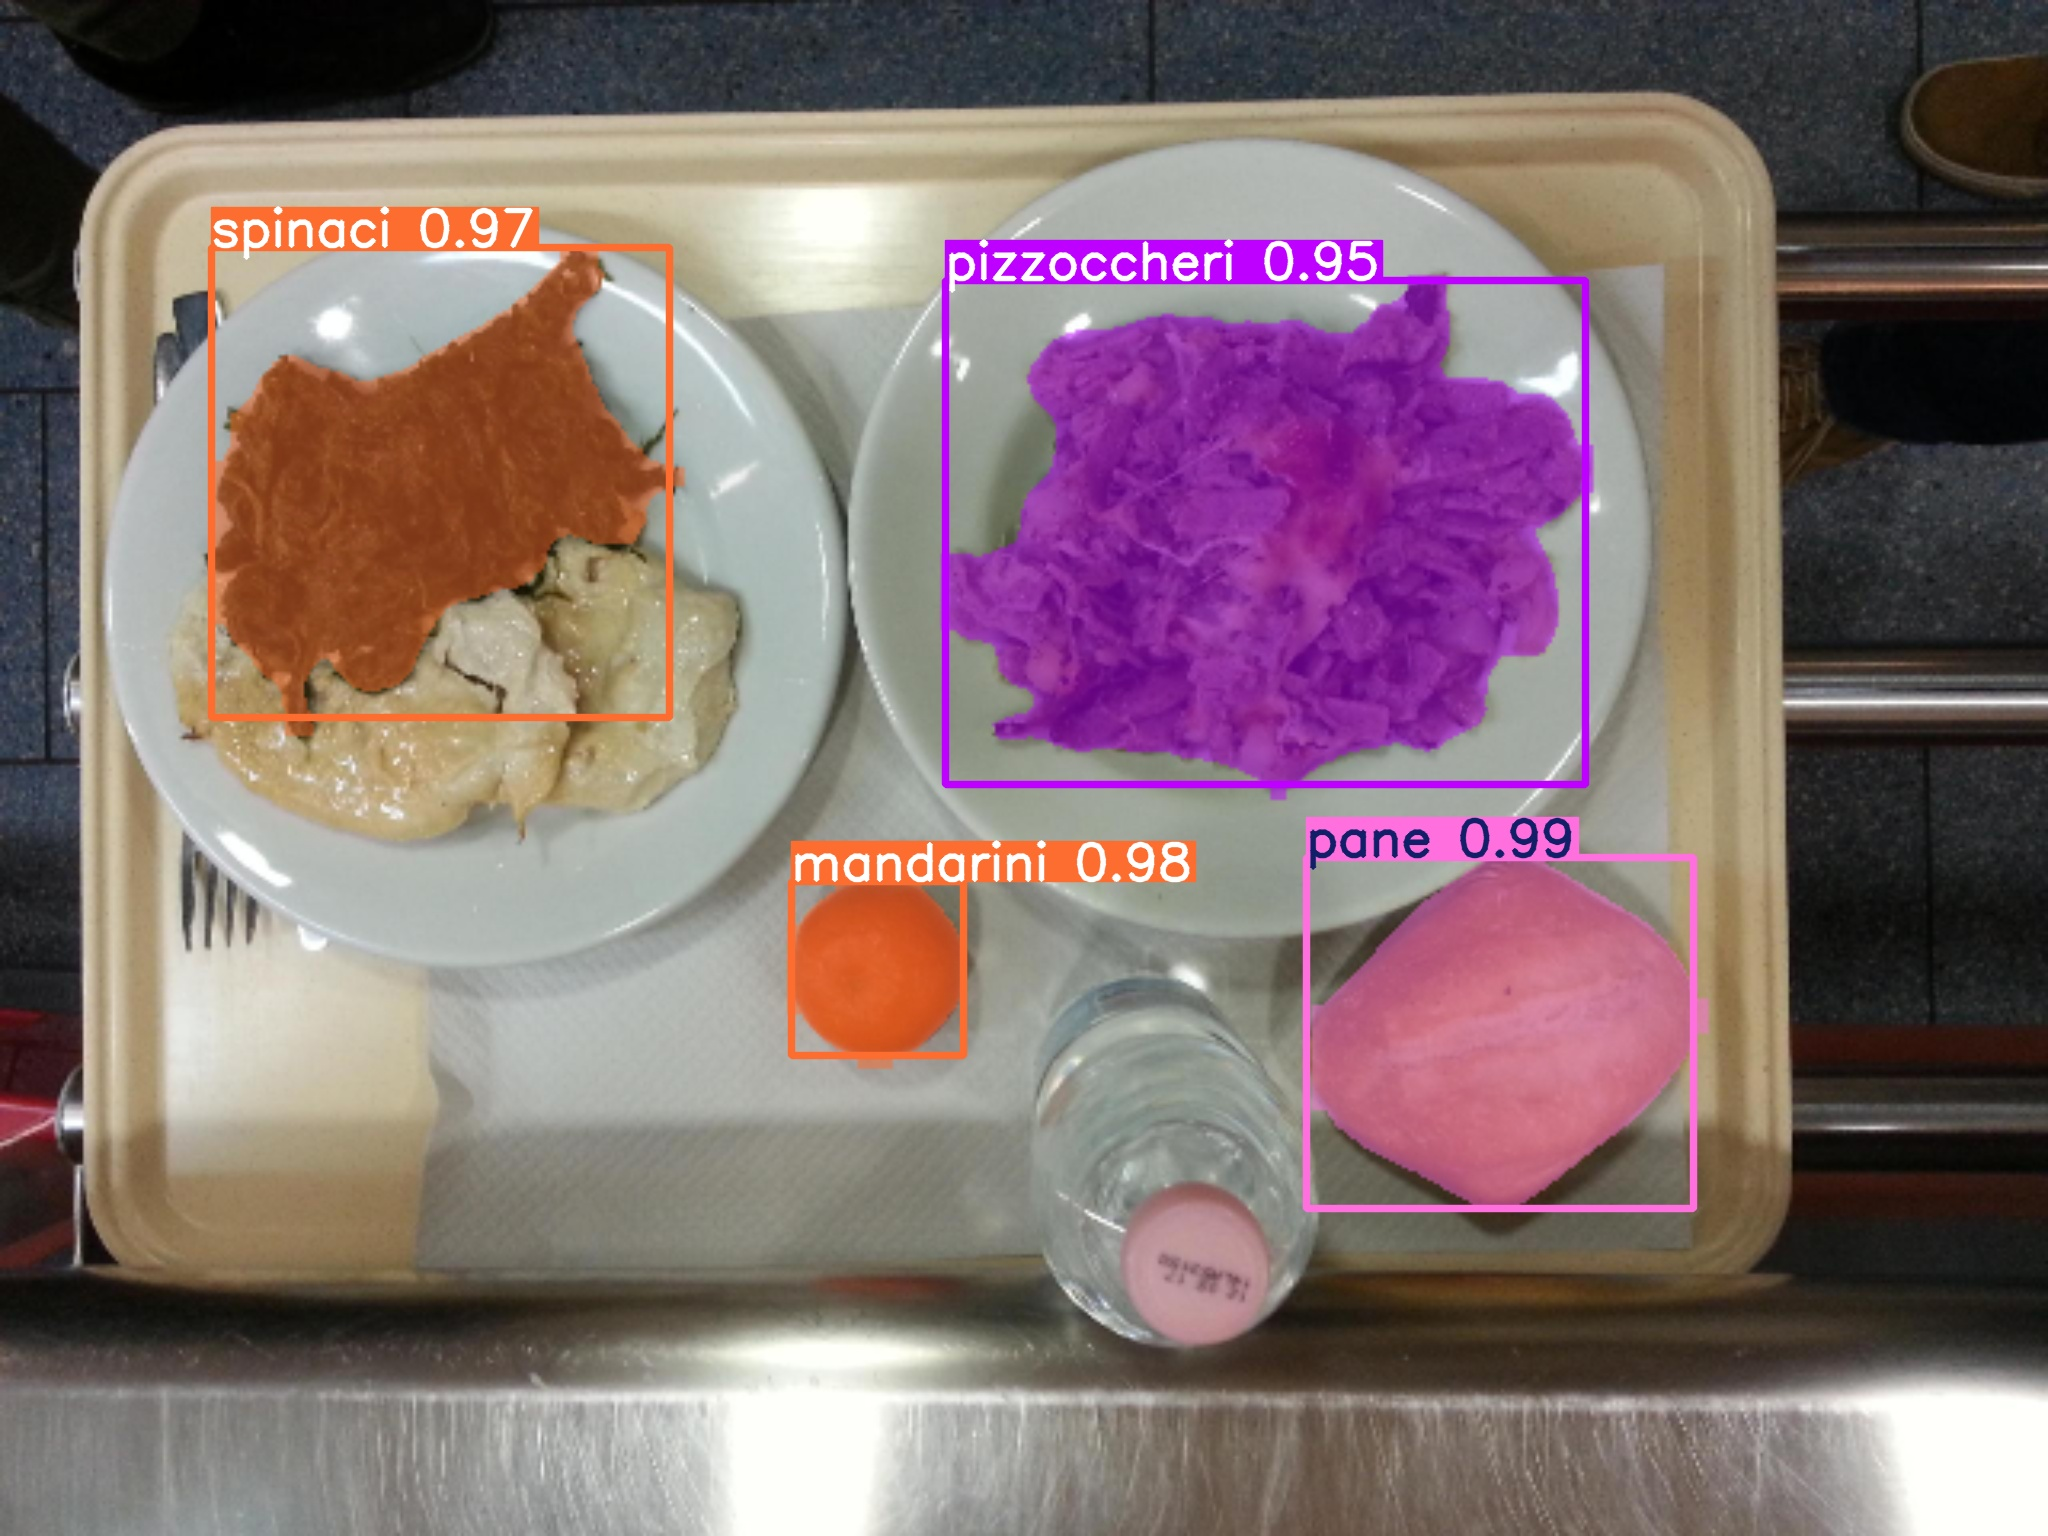

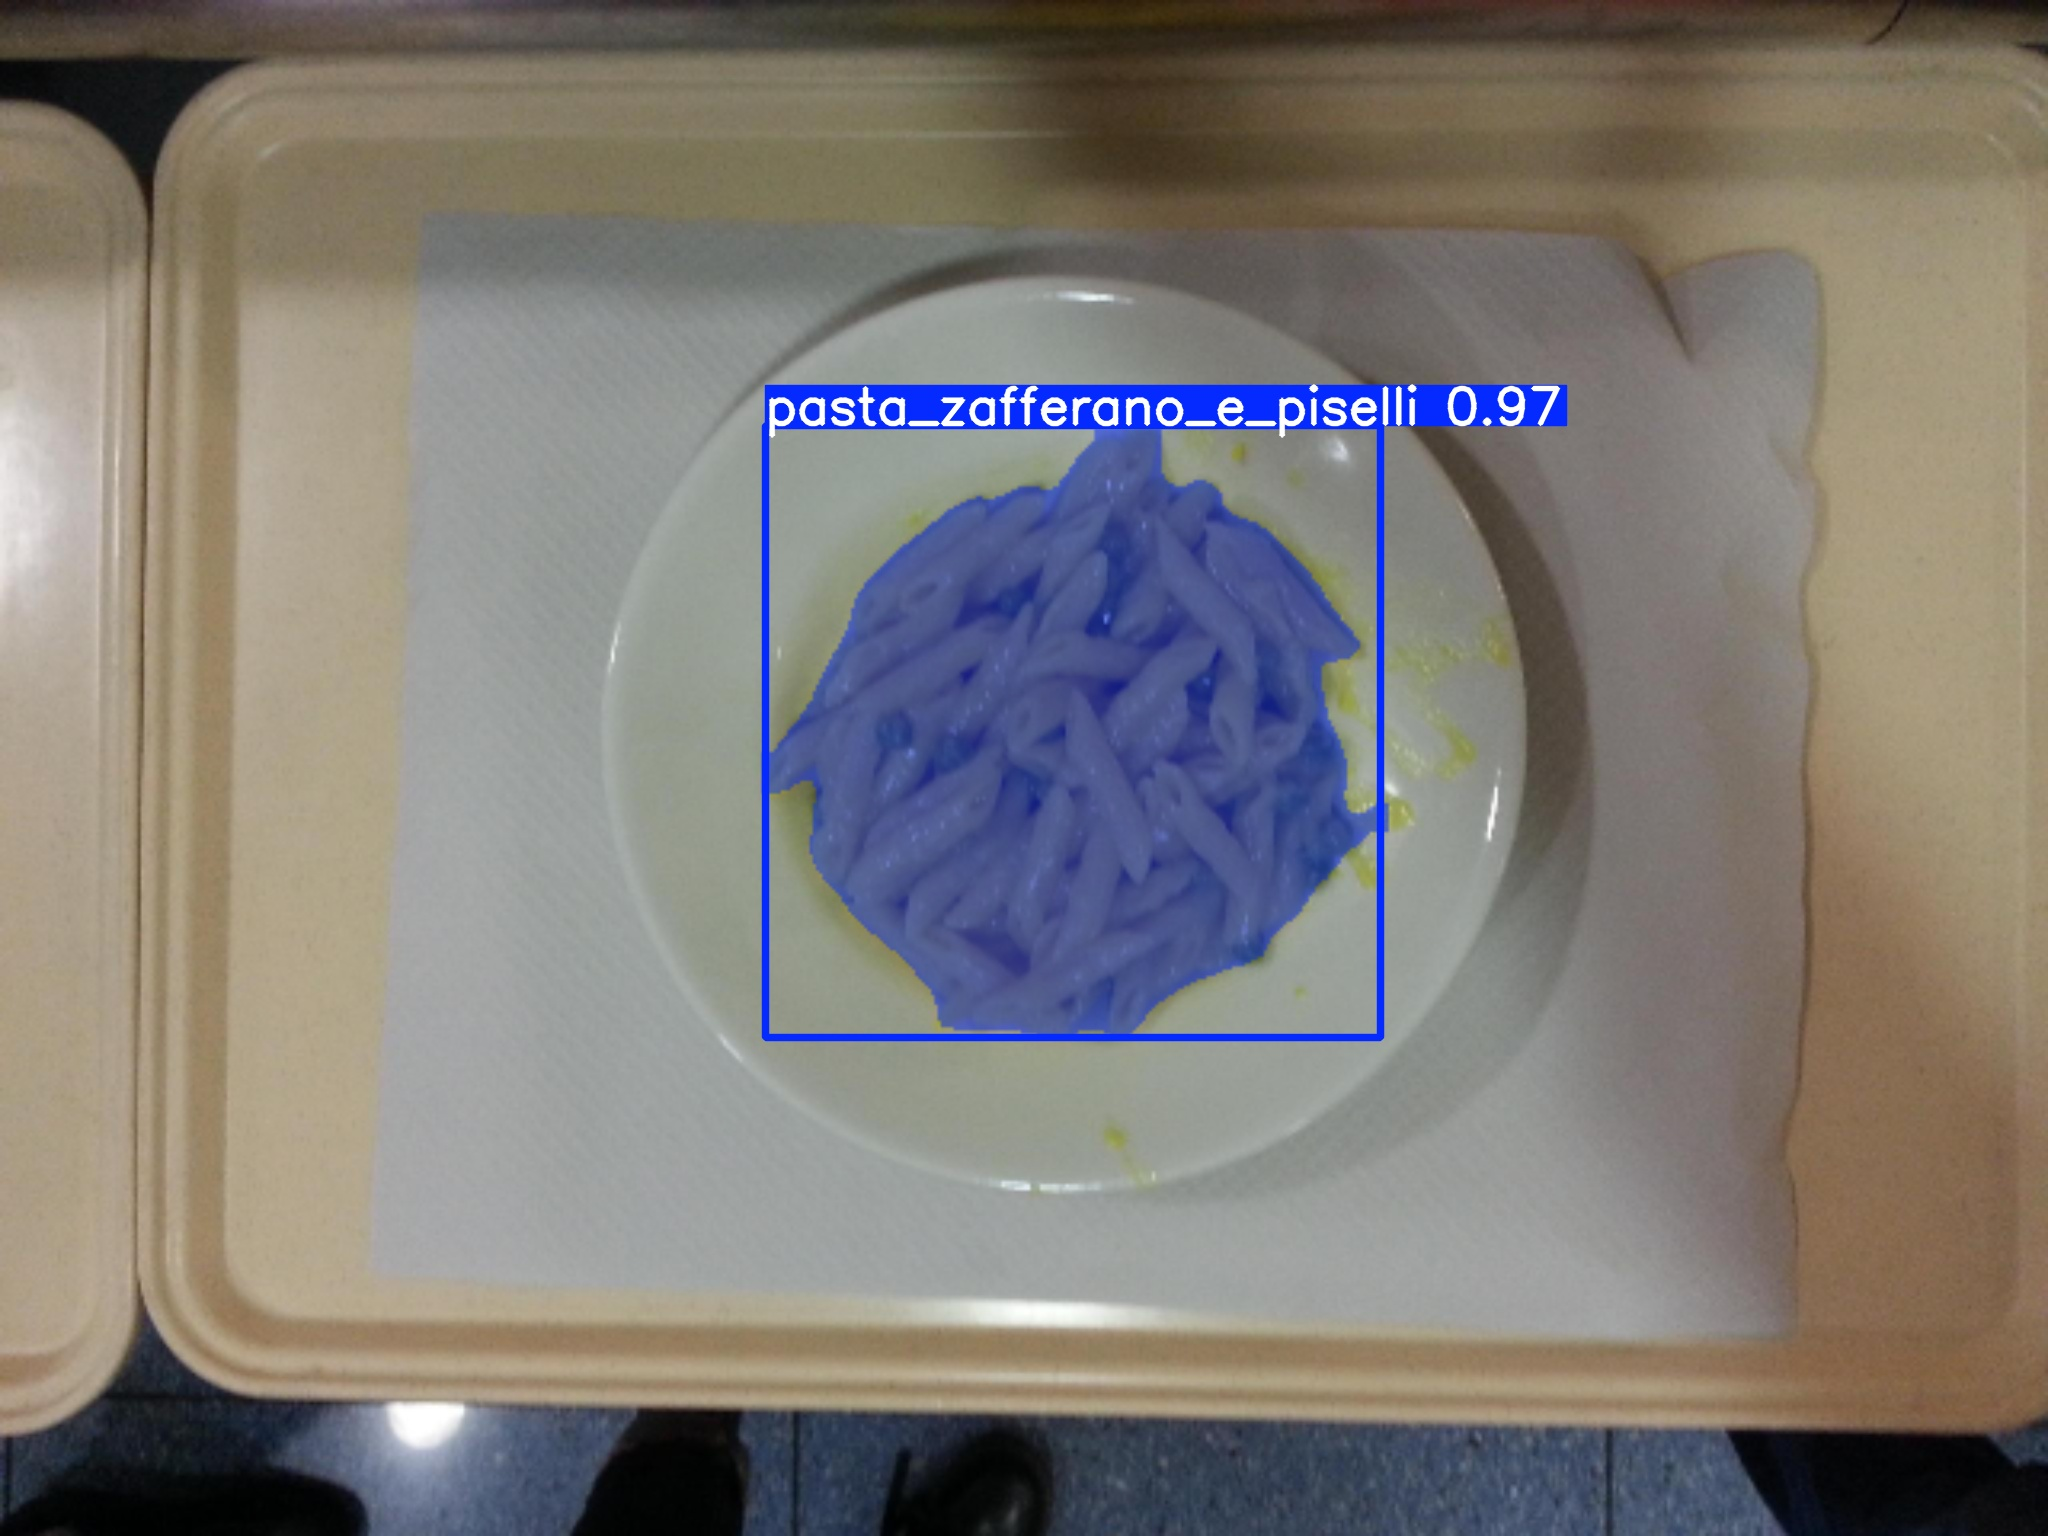

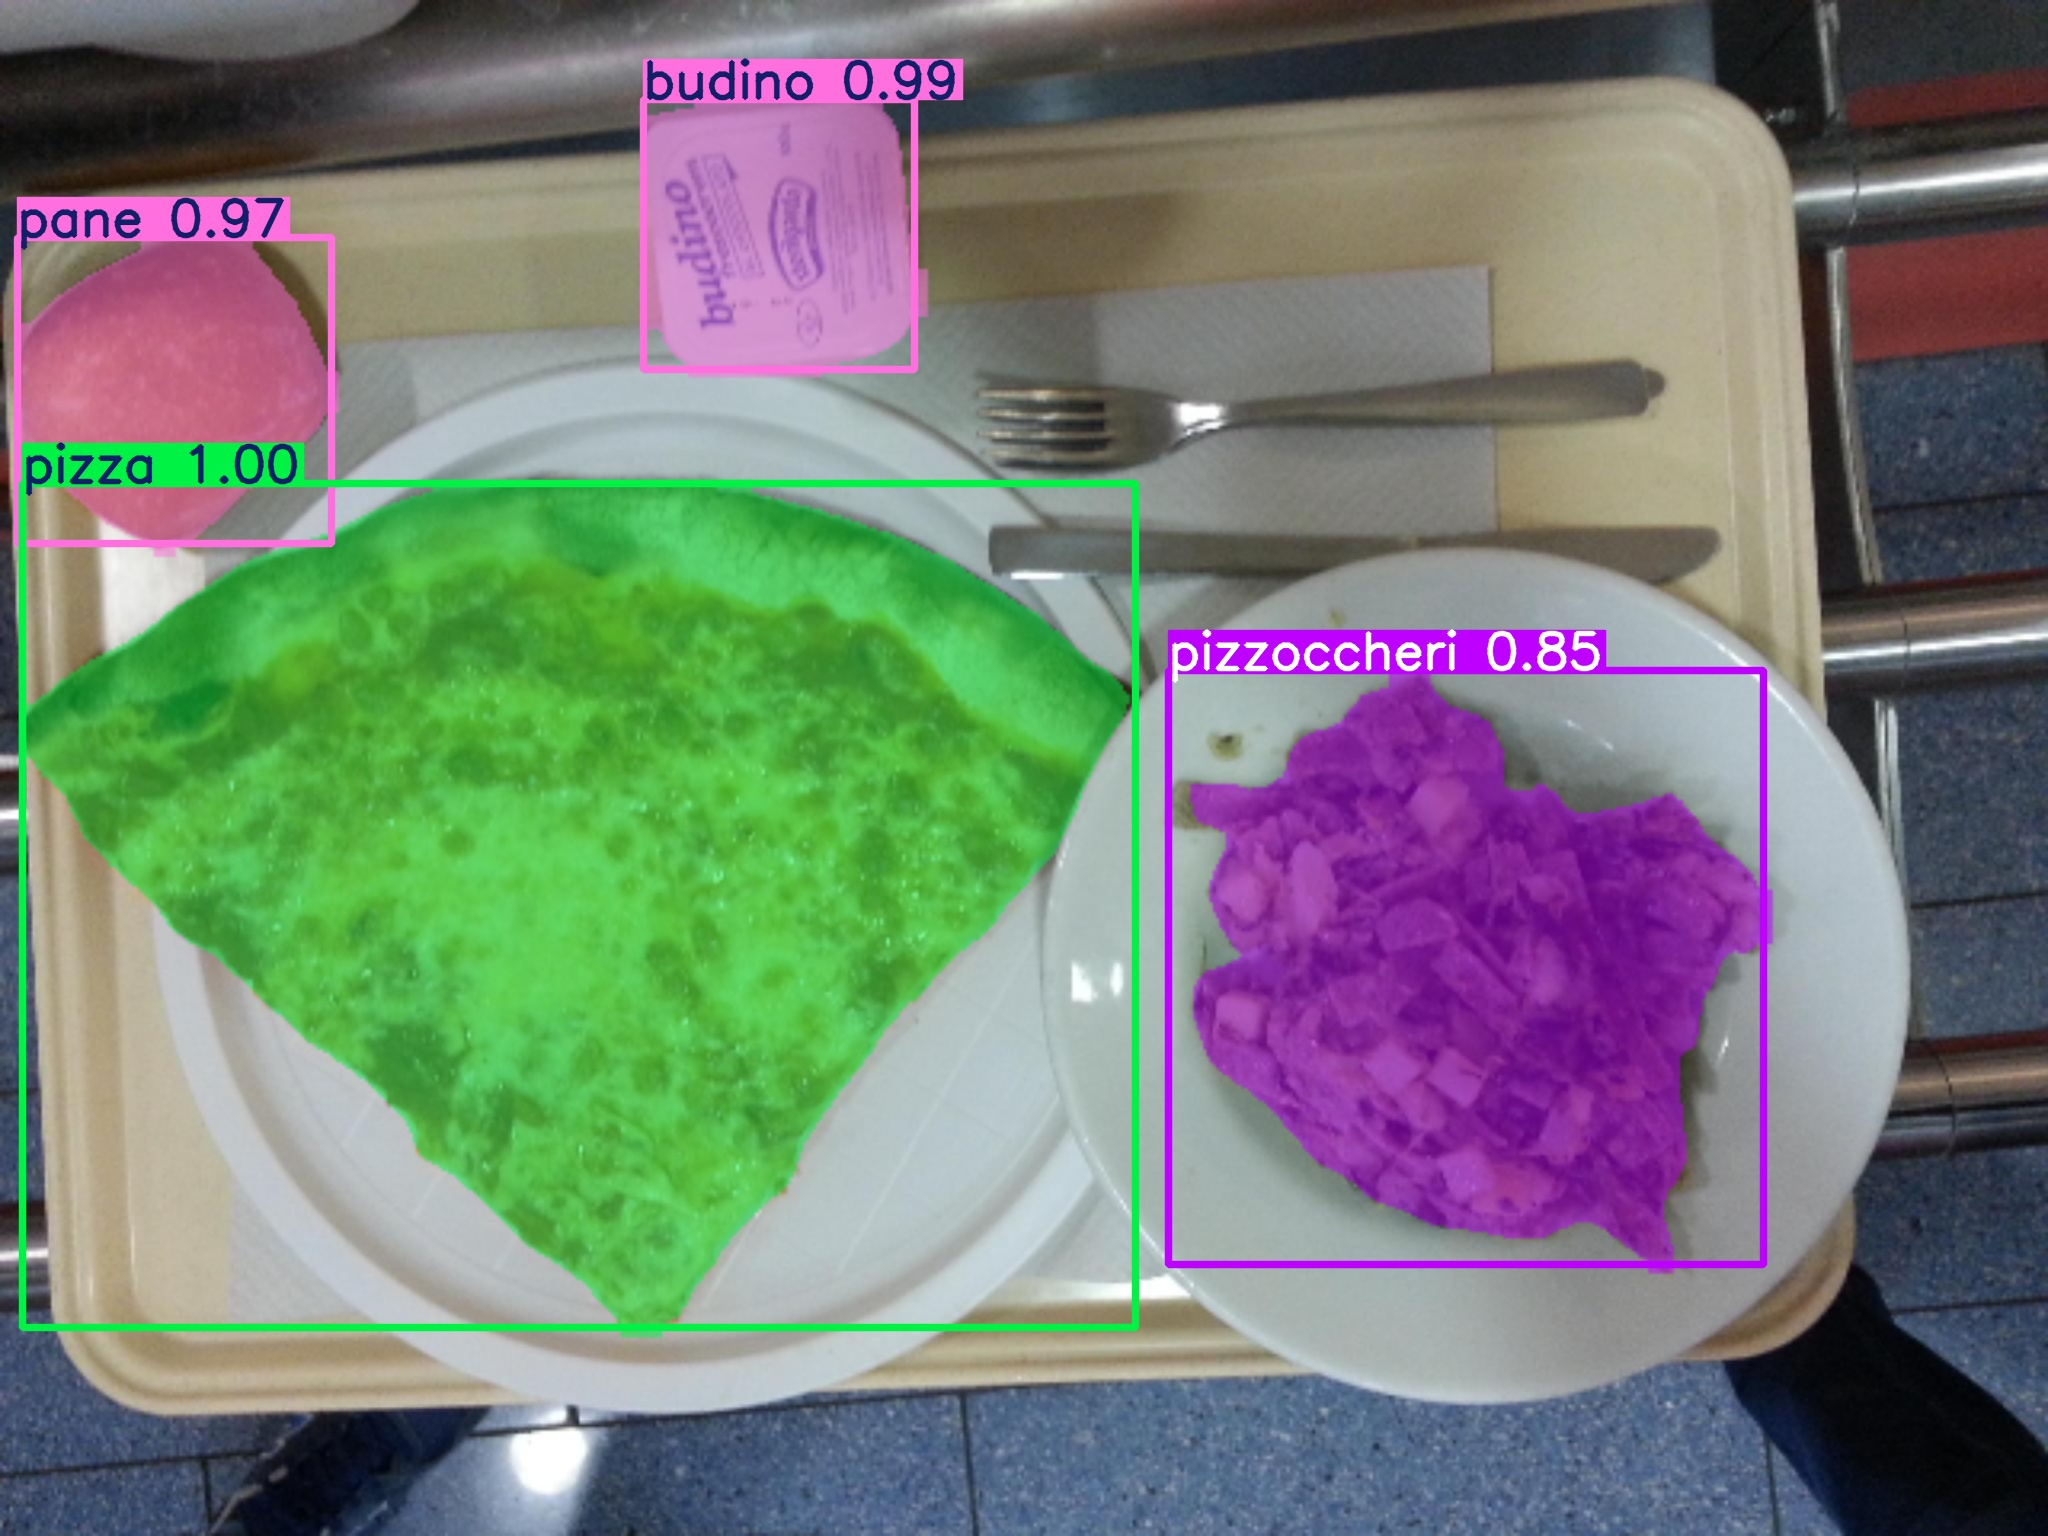

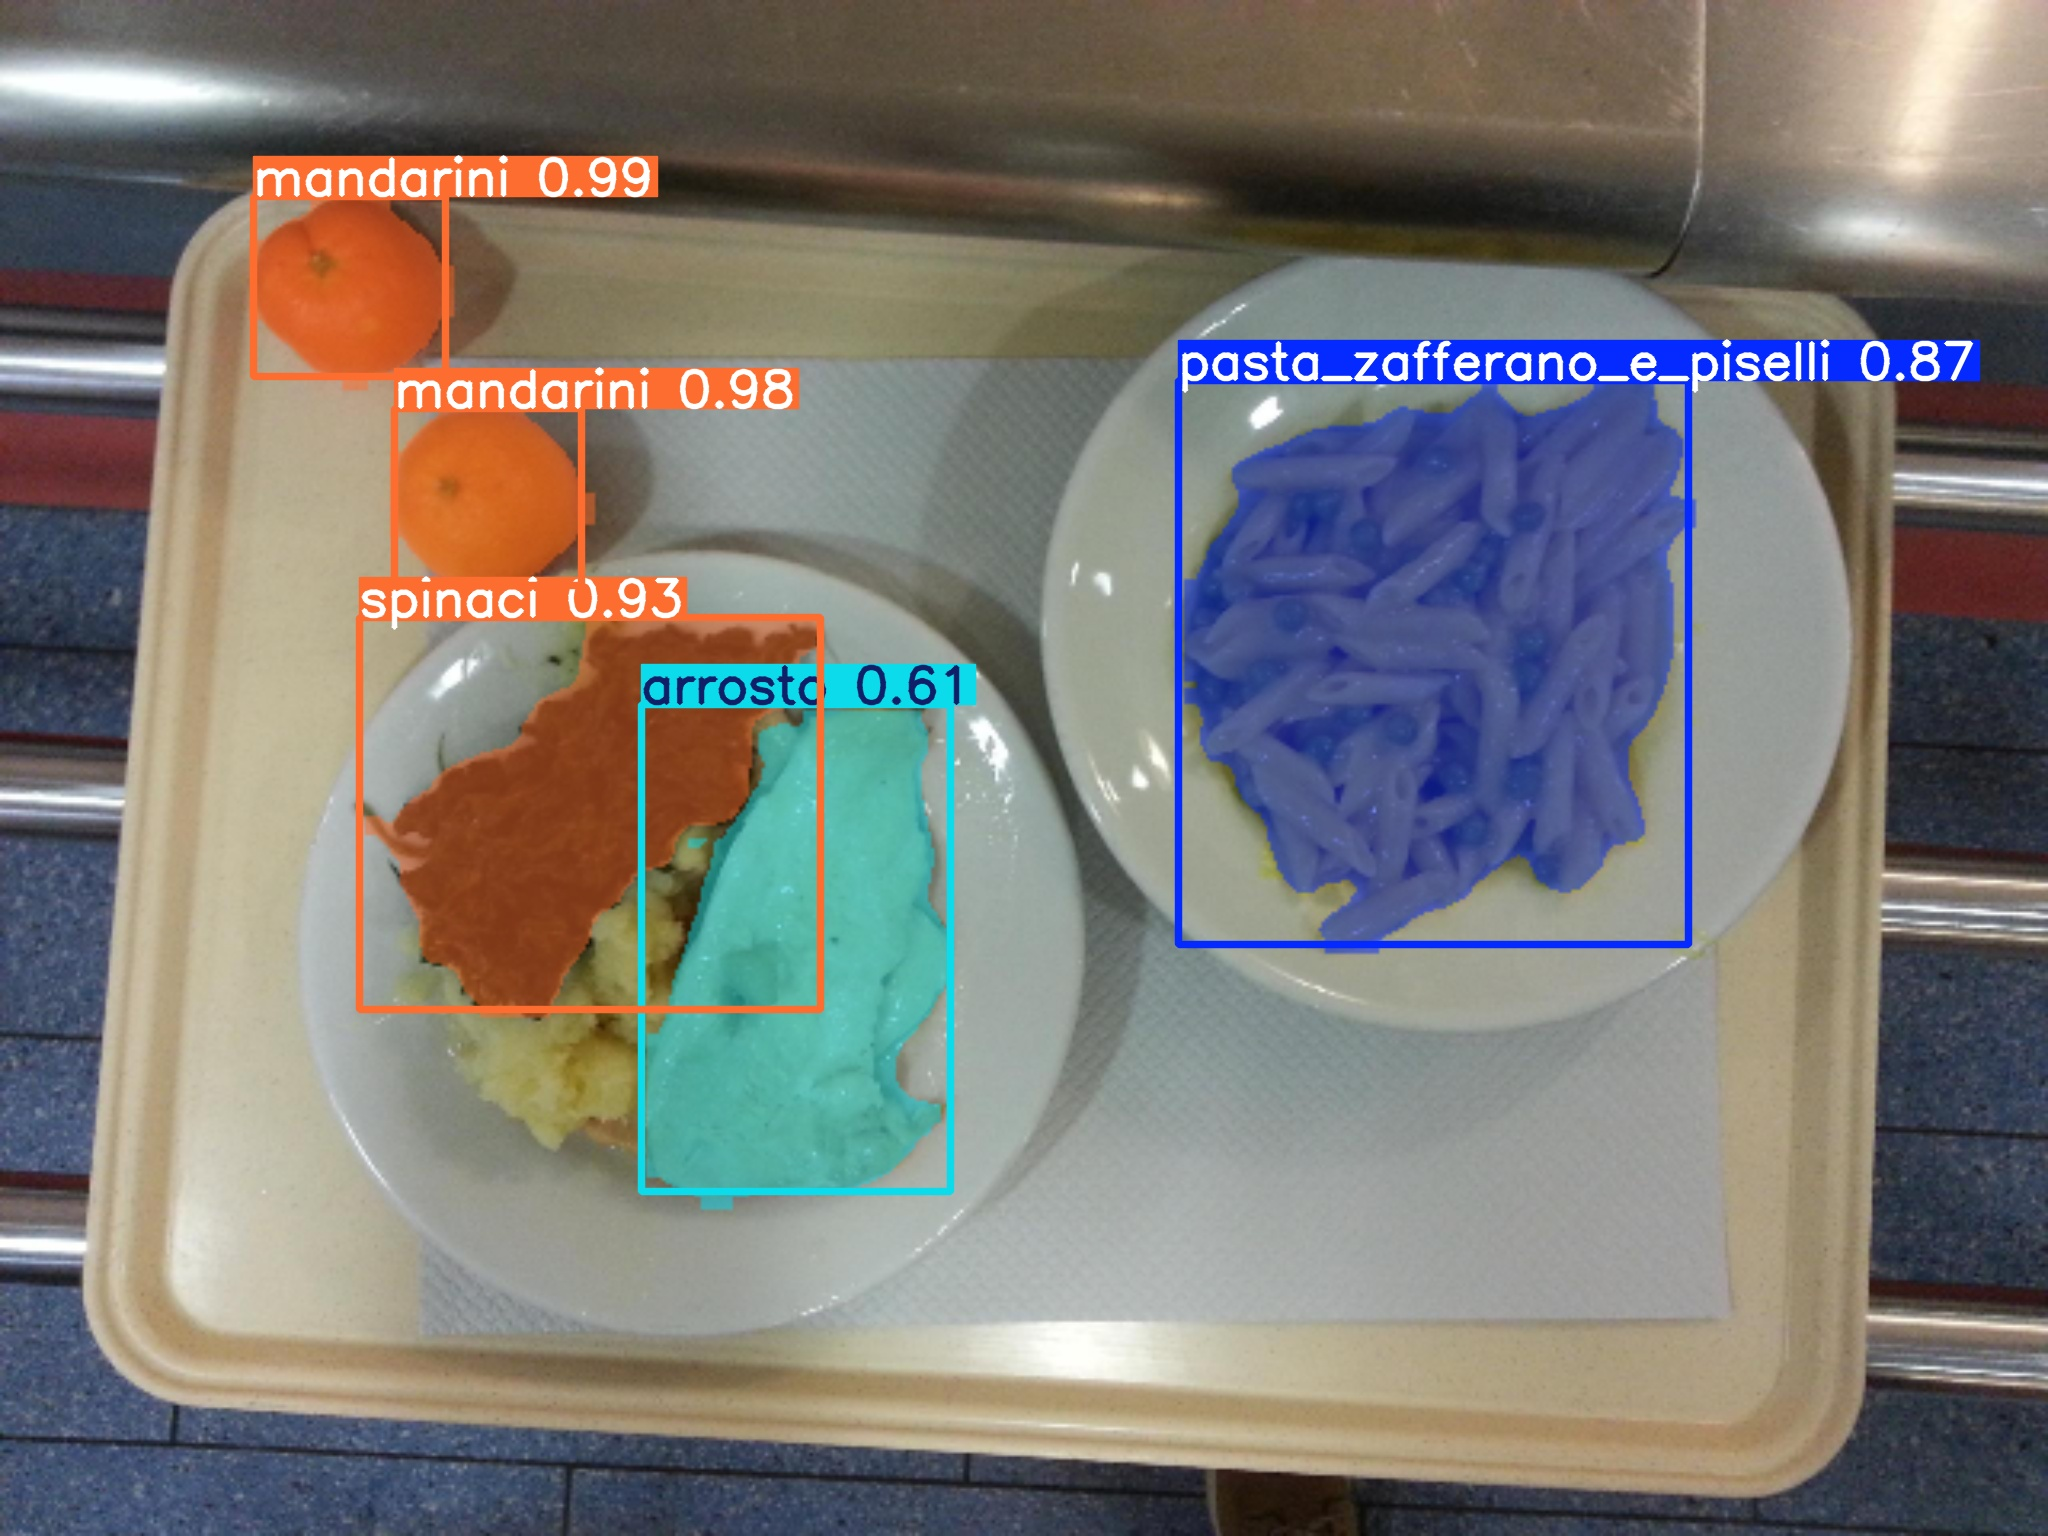

In [9]:
# 👀 Visualize YOLOv8 segmentation on a few validation images (no data_yaml var needed)

import os, glob
from pathlib import Path
from IPython.display import Image, display

# 0) If model isn't in memory, reload your best weights (update path if needed)
# from ultralytics import YOLO
model = YOLO("/content/runs/segment/train3/weights/best.pt")

# 1) Find data.yaml automatically inside unimib2016-1
data_yaml_candidates = glob.glob("/content/unimib2016-1/**/*.yaml", recursive=True)
data_yaml = None
for p in data_yaml_candidates:
    if os.path.basename(p) == "data.yaml":
        data_yaml = p
        break

if data_yaml is None:
    raise FileNotFoundError("Couldn't find data.yaml inside /content/unimib2016-1")

print("Using data.yaml at:", data_yaml)

# 2) Locate validation images
data_root = Path(data_yaml).parent          # folder that contains data.yaml
val_img_dir = data_root / "valid" / "images"
print("Validation images folder:", val_img_dir)

# 3) Pick a few sample validation images
val_images = sorted(glob.glob(str(val_img_dir / "*")))[:4]
print(f"Using {len(val_images)} validation images:")
for p in val_images:
    print(" -", p)

# 4) Run segmentation predictions and save visualized outputs
pred_results = model.predict(
    source=val_images,
    task="segment",
    conf=0.5,
    imgsz=640,
    save=True,
    save_txt=False,
)

# 5) Display prediction images
pred_dir = pred_results[0].save_dir
print("\nPredictions saved to:", pred_dir)

predicted_imgs = sorted(glob.glob(os.path.join(pred_dir, "*")))[:4]
for img_path in predicted_imgs:
    display(Image(filename=img_path))


Using model along with swift app to calculate the volume of the foods.

In [10]:


FOOD_PROPS = {
    # Fruits
    "arancia": {"density_g_per_cm3": 0.75, "avg_height_cm": 6.0, "shape": "sphere", "aliases": ["arancia"]},
    "banane": {"density_g_per_cm3": 0.94, "avg_height_cm": 3.0, "shape": "cylinder", "aliases": ["banane"]},
    "mandarini": {"density_g_per_cm3": 0.70, "avg_height_cm": 5.0, "shape": "sphere", "aliases": ["mandarini"]},
    "mele": {"density_g_per_cm3": 0.61, "avg_height_cm": 7.0, "shape": "sphere", "aliases": ["mele"]},
    "pere": {"density_g_per_cm3": 0.59, "avg_height_cm": 7.0, "shape": "sphere", "aliases": ["pere"]},

    # Vegetables
    "carote": {"density_g_per_cm3": 0.96, "avg_height_cm": 2.5, "shape": "cylinder", "aliases": ["carote"]},
    "cavolfiore": {"density_g_per_cm3": 0.40, "avg_height_cm": 5.0, "shape": "irregular", "aliases": ["cavolfiore"]},
    "fagiolini": {"density_g_per_cm3": 0.41, "avg_height_cm": 2.0, "shape": "pile", "aliases": ["fagiolini"]},
    "finocchi_gratinati": {"density_g_per_cm3": 0.55, "avg_height_cm": 4.0, "shape": "prism", "aliases": ["finocchi_gratinati"]},
    "finocchi_in_umido": {"density_g_per_cm3": 0.60, "avg_height_cm": 3.5, "shape": "stew", "aliases": ["finocchi_in_umido"]},
    "insalata_mista": {"density_g_per_cm3": 0.12, "avg_height_cm": 4.0, "shape": "pile", "aliases": ["insalata_mista"]},
    "patatine_fritte": {"density_g_per_cm3": 0.40, "avg_height_cm": 3.0, "shape": "pile", "aliases": ["patatine_fritte"]},
    "piselli": {"density_g_per_cm3": 0.67, "avg_height_cm": 2.0, "shape": "pile", "aliases": ["piselli"]},
    "spinaci": {"density_g_per_cm3": 0.45, "avg_height_cm": 3.0, "shape": "pile", "aliases": ["spinaci"]},
    "zucchine_impanate": {"density_g_per_cm3": 0.65, "avg_height_cm": 2.0, "shape": "prism", "aliases": ["zucchine_impanate"]},
    "zucchine_umido": {"density_g_per_cm3": 0.60, "avg_height_cm": 3.5, "shape": "stew", "aliases": ["zucchine_umido"]},

    # Breads / bakery
    "pane": {"density_g_per_cm3": 0.27, "avg_height_cm": 3.0, "shape": "prism", "aliases": ["pane"]},
    "focaccia_bianca": {"density_g_per_cm3": 0.25, "avg_height_cm": 2.0, "shape": "prism", "aliases": ["focaccia_bianca"]},
    "pizza": {"density_g_per_cm3": 0.33, "avg_height_cm": 2.0, "shape": "prism", "aliases": ["pizza"]},

    # Desserts
    "budino": {"density_g_per_cm3": 1.05, "avg_height_cm": 4.0, "shape": "prism", "aliases": ["budino"]},
    "strudel": {"density_g_per_cm3": 0.45, "avg_height_cm": 3.0, "shape": "prism", "aliases": ["strudel"]},
    "torta_ananas": {"density_g_per_cm3": 0.55, "avg_height_cm": 4.0, "shape": "prism", "aliases": ["torta_ananas"]},
    "torta_cioccolato_e_pere": {"density_g_per_cm3": 0.65, "avg_height_cm": 4.0, "shape": "prism", "aliases": ["torta_cioccolato_e_pere"]},
    "torta_crema": {"density_g_per_cm3": 0.70, "avg_height_cm": 4.0, "shape": "prism", "aliases": ["torta_crema"]},
    "torta_crema_2": {"density_g_per_cm3": 0.70, "avg_height_cm": 4.0, "shape": "prism", "aliases": ["torta_crema_2"]},
    "torta_salata_-alla_valdostana-": {"density_g_per_cm3": 0.60, "avg_height_cm": 3.5, "shape": "prism"},
    "torta_salata_3": {"density_g_per_cm3": 0.60, "avg_height_cm": 3.5, "shape": "prism"},
    "torta_salata_rustica_-zucchine-": {"density_g_per_cm3": 0.55, "avg_height_cm": 3.0, "shape": "prism"},
    "torta_salata_spinaci_e_ricotta": {"density_g_per_cm3": 0.58, "avg_height_cm": 3.0, "shape": "prism"},
    "yogurt": {"density_g_per_cm3": 1.03, "avg_height_cm": 4.0, "shape": "liquid"},

    # Meats
    "arrosto": {"density_g_per_cm3": 1.05, "avg_height_cm": 4.0, "shape": "prism"},
    "arrosto_di_vitello": {"density_g_per_cm3": 1.04, "avg_height_cm": 4.0, "shape": "prism"},
    "bruscitt": {"density_g_per_cm3": 0.90, "avg_height_cm": 3.0, "shape": "pile"},
    "cotoletta": {"density_g_per_cm3": 0.95, "avg_height_cm": 1.5, "shape": "prism"},
    "medaglioni_di_carne": {"density_g_per_cm3": 1.05, "avg_height_cm": 2.0, "shape": "cylinder"},
    "polpette_di_carne": {"density_g_per_cm3": 1.03, "avg_height_cm": 3.0, "shape": "sphere"},
    "roastbeef": {"density_g_per_cm3": 1.05, "avg_height_cm": 4.0, "shape": "prism", "aliases": ["roastbeef", "rosbeef"]},
    "rosbeef": {"density_g_per_cm3": 1.05, "avg_height_cm": 4.0, "shape": "prism", "aliases": ["roastbeef", "rosbeef"]},
    "scaloppine": {"density_g_per_cm3": 1.03, "avg_height_cm": 1.5, "shape": "prism"},
    "stinco_di_maiale": {"density_g_per_cm3": 1.10, "avg_height_cm": 5.0, "shape": "irregular"},

    # Fish
    "guazzetto_di_calamari": {"density_g_per_cm3": 1.00, "avg_height_cm": 4.0, "shape": "stew"},
    "merluzzo_alle_olive": {"density_g_per_cm3": 1.02, "avg_height_cm": 3.0, "shape": "fillet"},
    "pesce_-filetto-": {"density_g_per_cm3": 1.02, "avg_height_cm": 2.0, "shape": "fillet"},
    "pesce_2_-filetto-": {"density_g_per_cm3": 1.02, "avg_height_cm": 2.0, "shape": "fillet"},
    "salmone_-da_menu_sembra_spada_in_realta-": {"density_g_per_cm3": 1.04, "avg_height_cm": 3.0, "shape": "fillet"},

    # Eggs / dairy / purees
    "patate-pure": {"density_g_per_cm3": 0.85, "avg_height_cm": 3.0, "shape": "pile"},
    "patate-pure_prosciutto": {"density_g_per_cm3": 0.90, "avg_height_cm": 3.0, "shape": "pile"},

    # Rice
    "riso_bianco": {"density_g_per_cm3": 0.85, "avg_height_cm": 2.5, "shape": "pile"},
    "riso_sugo": {"density_g_per_cm3": 0.90, "avg_height_cm": 3.0, "shape": "pile"},

    # All pasta categories
    # densities of cooked pasta ~0.95–1.05 g/cm³ with sauce variation
    "pasta_bianco": {"density_g_per_cm3": 0.95, "avg_height_cm": 3.0, "shape": "pile"},
    "orecchiette_-ragu-": {"density_g_per_cm3": 1.05, "avg_height_cm": 3.0, "shape": "pile"},
    "pasta_cozze_e_vongole": {"density_g_per_cm3": 1.00, "avg_height_cm": 3.5, "shape": "pile"},
    "pasta_e_ceci": {"density_g_per_cm3": 1.05, "avg_height_cm": 3.5, "shape": "pile"},
    "pasta_e_fagioli": {"density_g_per_cm3": 1.05, "avg_height_cm": 3.5},
    "pasta_mare_e_monti": {"density_g_per_cm3": 1.05, "avg_height_cm": 3.5},
    "pasta_pancetta_e_zucchine": {"density_g_per_cm3": 1.02, "avg_height_cm": 3.0},
    "pasta_pesto_besciamella_e_cornetti": {"density_g_per_cm3": 1.02, "avg_height_cm": 3.5},
    "pasta_ricotta_e_salsiccia": {"density_g_per_cm3": 1.04, "avg_height_cm": 3.5},
    "pasta_sugo": {"density_g_per_cm3": 1.00, "avg_height_cm": 3.0},
    "pasta_sugo_pesce": {"density_g_per_cm3": 1.02, "avg_height_cm": 3.0},
    "pasta_sugo_vegetariano": {"density_g_per_cm3": 1.00, "avg_height_cm": 3.0},
    "pasta_tonno": {"density_g_per_cm3": 1.02, "avg_height_cm": 3.5},
    "pasta_tonno_e_piselli": {"density_g_per_cm3": 1.02, "avg_height_cm": 3.5},
    "pasta_zafferano_e_piselli": {"density_g_per_cm3": 1.02, "avg_height_cm": 3.5},

    # Soups and liquid dishes
    "minestra": {"density_g_per_cm3": 1.00, "avg_height_cm": 5.0, "shape": "liquid"},
    "minestra_lombarda": {"density_g_per_cm3": 1.02, "avg_height_cm": 5.0},
    "crema_zucca_e_fagioli": {"density_g_per_cm3": 1.00, "avg_height_cm": 4.0, "shape": "liquid"},
    "passato_alla_piemontese": {"density_g_per_cm3": 1.02, "avg_height_cm": 4.0, "shape": "liquid"},

    # Other items
    "cibo_bianco_non_identificato": {"density_g_per_cm3": 1.00, "avg_height_cm": 3.0, "shape": "unknown"},
    "pizzoccheri": {"density_g_per_cm3": 1.00, "avg_height_cm": 3.0, "shape": "pile"},
}

# Patch FOOD_PROPS with energy density (kcal per gram).
# These values are approximate, but reasonable for cooked cafeteria servings.

KCALS_PER_GRAM_PATCH = {
    # Fruits (≈ 0.45–0.6 kcal/g)
    "arancia": 0.47,
    "banane": 0.89,
    "mandarini": 0.53,
    "mele": 0.52,
    "pere": 0.57,

    # Vegetables (generally low kcal/g)
    "carote": 0.41,
    "cavolfiore": 0.25,
    "fagiolini": 0.35,
    "finocchi_gratinati": 0.80,          # gratin adds fat/cheese
    "finocchi_in_umido": 0.35,
    "insalata_mista": 0.20,
    "patatine_fritte": 3.00,             # fries are energy dense
    "piselli": 0.81,
    "spinaci": 0.23,
    "zucchine_impanate": 1.50,
    "zucchine_umido": 0.30,

    # Bread / bakery
    "pane": 2.60,
    "focaccia_bianca": 2.80,
    "pizza": 2.50,

    # Desserts (very rough but in the right ballpark)
    "budino": 1.20,
    "strudel": 2.50,
    "torta_ananas": 2.40,
    "torta_cioccolato_e_pere": 3.50,
    "torta_crema": 2.80,
    "torta_crema_2": 2.80,
    "torta_salata_-alla_valdostana-": 2.50,
    "torta_salata_3": 2.50,
    "torta_salata_rustica_-zucchine-": 2.20,
    "torta_salata_spinaci_e_ricotta": 2.20,
    "yogurt": 0.70,                      # assume low-fat plain

    # Meats and fish (cooked)
    "arrosto": 2.00,
    "arrosto_di_vitello": 1.90,
    "bruscitt": 1.90,
    "cotoletta": 2.50,
    "medaglioni_di_carne": 2.10,
    "polpette_di_carne": 2.30,
    "roastbeef": 1.80,
    "rosbeef": 1.80,
    "scaloppine": 1.90,
    "stinco_di_maiale": 2.50,
    "guazzetto_di_calamari": 1.00,
    "merluzzo_alle_olive": 1.20,
    "pesce_-filetto-": 1.10,
    "pesce_2_-filetto-": 1.10,
    "salmone_-da_menu_sembra_spada_in_realta-": 2.00,

    # Purees and rice
    "patate-pure": 0.85,
    "patate-pure_prosciutto": 1.10,
    "riso_bianco": 1.30,
    "riso_sugo": 1.50,

    # Pasta dishes
    "pasta_bianco": 1.30,
    "orecchiette_-ragu-": 1.80,
    "pasta_cozze_e_vongole": 1.30,
    "pasta_e_ceci": 1.60,
    "pasta_e_fagioli": 1.60,
    "pasta_mare_e_monti": 1.60,
    "pasta_pancetta_e_zucchine": 1.90,
    "pasta_pesto_besciamella_e_cornetti": 2.10,
    "pasta_ricotta_e_salsiccia": 2.20,
    "pasta_sugo": 1.40,
    "pasta_sugo_pesce": 1.50,
    "pasta_sugo_vegetariano": 1.30,
    "pasta_tonno": 1.60,
    "pasta_tonno_e_piselli": 1.60,
    "pasta_zafferano_e_piselli": 1.50,

    # Soups and liquids
    "minestra": 0.60,
    "minestra_lombarda": 0.80,
    "crema_zucca_e_fagioli": 0.80,
    "passato_alla_piemontese": 0.80,

    # Misc
    "cibo_bianco_non_identificato": 1.00,
    "pizzoccheri": 1.70,
}

# Attach kcal_per_gram to FOOD_PROPS where available
for name, props in FOOD_PROPS.items():
    kcal = KCALS_PER_GRAM_PATCH.get(name, None)
    props["kcal_per_gram"] = kcal


In [11]:
!pip install fastapi uvicorn pyngrok python-multipart nest-asyncio

In [ ]:
from google.colab import userdata
import cv2
import numpy as np
import base64
import io
from fastapi import FastAPI, UploadFile, File
from PIL import Image
from pydantic import BaseModel
import uvicorn
import nest_asyncio
from pyngrok import ngrok, conf
from ultralytics import YOLO
import os
import asyncio # Import asyncio

# 1. Initialize App
app = FastAPI()

# 2. Load your trained model
model = YOLO("/content/runs/segment/train3/weights/best.pt")

def lookup_food_props(food_name: str):
    """
    Look up the properties for a given YOLO class name using FOOD_PROPS.
    Uses exact match first, then alias-based match.
    """
    if food_name in FOOD_PROPS:
        return FOOD_PROPS[food_name]

    for key, props in FOOD_PROPS.items():
        aliases = props.get("aliases", [])
        if food_name in aliases:
            return props

    return None

# 3. Define Response Model

class CalorieRequestItem(BaseModel):
    food_name: str
    volume_cm3: float

class CalorieRequest(BaseModel):
    items: list[CalorieRequestItem]

class CalorieResponseItem(BaseModel):
    food_name: str
    volume_cm3: float
    mass_g: float | None
    calories_kcal: float | None
    error: str | None = None

class CalorieResponse(BaseModel):
    items: list[CalorieResponseItem]
    total_calories_kcal: float

class SegmentationResponse(BaseModel):
    masks: list[str]  # List of base64-encoded masks
    food_names: list[str]  # List of detected food names
    boxes: list[list[float]]  # Bounding boxes [x1, y1, x2, y2]
    confidences: list[float]  # Confidence scores

def estimate_calories_from_volume(food_name: str, volume_cm3: float):
    """
    Calculate calories from volume using density and calorie density.

    Returns:
        dict with food_name, volume_cm3, mass_g, calories_kcal
        or None if data is missing
    """
    if volume_cm3 is None:
        return None

    props = lookup_food_props(food_name)
    if props is None:
        print(f"[WARN] No FOOD_PROPS entry for class '{food_name}'")
        return None

    density = props.get("density_g_per_cm3", None)
    kcal_per_gram = props.get("kcal_per_gram", None)

    if density is None:
        print(f"[WARN] Missing density for '{food_name}'")
        return None
    if kcal_per_gram is None:
        print(f"[WARN] Missing kcal_per_gram for '{food_name}'")
        return None

    mass_g = density * volume_cm3
    calories = mass_g * kcal_per_gram

    return {
        "food_name": food_name,
        "volume_cm3": float(volume_cm3),
        "mass_g": float(mass_g),
        "calories_kcal": float(calories),
    }

def process_image(image_bytes):
    """Process image and return segmentation masks"""
    # Convert bytes to numpy array
    nparr = np.frombuffer(image_bytes, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    # Store original dimensions
    original_h, original_w, _ = img.shape
    print(f"Original image size: {original_w}x{original_h}")

    # Resize image to 2048x1536 for model
    img_resized = cv2.resize(img, (2048, 1536))
    resized_h, resized_w, _ = img_resized.shape
    print(f"Resized image size: {resized_w}x{resized_h}")

    # Calculate scaling factors
    scale_x = original_w / resized_w
    scale_y = original_h / resized_h
    print(f"Scale factors: x={scale_x}, y={scale_y}")

    # Run YOLO segmentation on resized image
    results = model.predict(
        source=img_resized,
        task="segment",
        conf=0.5,
        verbose=False
    )

    # Extract results
    result = results[0]
    masks_list = []
    food_names = []
    boxes_list = []
    confidences = []

    if result.masks is not None:
        # Process each detected object
        for i, (mask, box, conf, cls) in enumerate(zip(
            result.masks.data.cpu().numpy(),
            result.boxes.xyxy.cpu().numpy(),
            result.boxes.conf.cpu().numpy(),
            result.boxes.cls.cpu().numpy()
        )):
            # ✅ KEY FIX 1: Resize mask back to ORIGINAL image size
            mask_resized = cv2.resize(mask, (original_w, original_h), interpolation=cv2.INTER_NEAREST)

            # Convert to binary mask (0-255)
            binary_mask = (mask_resized * 255).astype(np.uint8)

            # Encode mask as PNG
            _, buffer = cv2.imencode('.png', binary_mask)
            mask_b64 = base64.b64encode(buffer).decode('utf-8')

            # Get class name
            class_name = result.names[int(cls)]

            # ✅ KEY FIX 2: Scale bounding box coordinates back to original image size
            scaled_box = [
                box[0] * scale_x,  # x1
                box[1] * scale_y,  # y1
                box[2] * scale_x,  # x2
                box[3] * scale_y   # y2
            ]

            print(f"Detection {i+1}: {class_name}")
            print(f"  Original box (resized coords): {box.tolist()}")
            print(f"  Scaled box (original coords): {scaled_box}")

            masks_list.append(mask_b64)
            food_names.append(class_name)
            boxes_list.append(scaled_box)
            confidences.append(float(conf))

    return masks_list, food_names, boxes_list, confidences

@app.post("/segment", response_model=SegmentationResponse)
async def segment_food(file: UploadFile = File(...)):
    image_bytes = await file.read()
    masks, names, boxes, confs = process_image(image_bytes)

    return SegmentationResponse(
        masks=masks,
        food_names=names,
        boxes=boxes,
        confidences=confs
    )


@app.post("/calculate_calories", response_model=CalorieResponse)
async def calculate_calories(request: CalorieRequest):
    """
    Calculate calories for food items based on their volumes.

    Request format:
    {
        "items": [
            {"food_name": "pizza", "volume_cm3": 245.3},
            {"food_name": "salad", "volume_cm3": 180.7}
        ]
    }
    """
    print(f"📊 [Calories] Received request for {len(request.items)} items")

    response_items = []
    total_calories = 0.0

    for item in request.items:
        print(f"   Processing: {item.food_name} ({item.volume_cm3} cm³)")

        # Calculate calories using the provided function
        result = estimate_calories_from_volume(item.food_name, item.volume_cm3)

        if result is not None:
            response_item = CalorieResponseItem(
                food_name=result["food_name"],
                volume_cm3=result["volume_cm3"],
                mass_g=result["mass_g"],
                calories_kcal=result["calories_kcal"],
                error=None
            )
            total_calories += result["calories_kcal"]
            print(f"   ✓ {result['mass_g']:.1f}g, {result['calories_kcal']:.1f} kcal")
        else:
            # Food not found in database or missing properties
            response_item = CalorieResponseItem(
                food_name=item.food_name,
                volume_cm3=item.volume_cm3,
                mass_g=None,
                calories_kcal=None,
                error=f"No nutrition data available for '{item.food_name}'"
            )
            print(f"   ⚠️ No data for {item.food_name}")

        response_items.append(response_item)

    print(f"📊 [Calories] Total: {total_calories:.1f} kcal")

    return CalorieResponse(
        items=response_items,
        total_calories_kcal=total_calories
    )

# 4. Run the Server

# get the NGROK token
NGROK_AUTHOTOKEN = '36XOEBUJ7WU5x2gINAjnfb0Yako_5475kHBJEFaAcSgCk2rws'
#os.environ['NGROK_AUTHTOKEN'] = userdata.get('NGROK_AUTHTOKEN')
os.environ['NGROK_AUTHTOKEN'] = NGROK_AUTHOTOKEN
conf.get_default().auth_token = os.environ['NGROK_AUTHTOKEN']
#ngrok.set_auth_token(userdata.get('NGROK_AUTHTOKEN'))
ngrok.set_auth_token(NGROK_AUTHOTOKEN)

nest_asyncio.apply()

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)

# Create a uvicorn server configuration
config = uvicorn.Config(app, host="0.0.0.0", port=8000, log_level="info")
# Create the server instance
server = uvicorn.Server(config)

# Get the currently running event loop (patched by nest_asyncio)
loop = asyncio.get_event_loop()

# Run the server's serve method within this loop
loop.run_until_complete(server.serve())

Public URL: https://volitive-pandurate-deanne.ngrok-free.dev


INFO:     Started server process [3750]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


In [ ]:
# TESTER CELL

test_names = ["pasta_sugo", "mele", "pane", 'mandarini']
test_volumes = [150.0, 100.0, 60.0, 64]  # cm^3, toy numbers

items, total_kcal = estimate_calories_for_batch(test_names, test_volumes)
print(items)
print("Total kcal:", total_kcal)


next game